In [3]:
from google.colab import files
import pandas as pd
import io

# Upload the file from your local computer
uploaded = files.upload()

# Load the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Now you can perform your data exploration
print("General info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSummary statistics for numerical features:")
print(df.describe())

print("\nValue counts for 'Sex':")
print(df['Sex'].value_counts())

print("\nValue counts for 'Pclass':")
print(df['Pclass'].value_counts())

print("\nValue counts for 'Embarked':")
print(df['Embarked'].value_counts(dropna=False))

print("\nSummary statistics for 'Age', 'Fare', 'SibSp', 'Parch':")
print(df[['Age', 'Fare', 'SibSp', 'Parch']].describe())


Saving train.csv to train.csv
General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket     

In [4]:
import pandas as pd

# 1. Load the Data
# Update the filepath as needed, for example: 'train.csv' if in the same folder
df = pd.read_csv('train.csv')

# 2. Check for Missing Values and Data Types
print("General info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSummary statistics for numerical features:")
print(df.describe())

# 3. Basic Data Exploration

print("\nValue counts for 'Sex':")
print(df['Sex'].value_counts())

print("\nValue counts for 'Pclass':")
print(df['Pclass'].value_counts())

print("\nValue counts for 'Embarked':")
print(df['Embarked'].value_counts(dropna=False))

print("\nSummary statistics for 'Age', 'Fare', 'SibSp', 'Parch':")
print(df[['Age', 'Fare', 'SibSp', 'Parch']].describe())


General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cab

In [5]:
import pandas as pd

# Assuming df is already loaded
# 1. Handle missing values

# Fill missing Age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin has many missing values; drop this column for now
df.drop(columns=['Cabin'], inplace=True)

# 2. Convert categorical variables to category dtype
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# 3. Optionally create new features
# Example: Family size as sum of siblings/spouses and parents/children + 1 (self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 4. Verify cleaned data info
print("After cleaning:")
print(df.info())

print("\nMissing values after cleaning:")
print(df.isnull().sum())


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  FamilySize   891 non-null    int64   
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 65.8+ KB
None

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare       

/tmp/ipython-input-3046876021.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3046876021.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [6]:
df.to_csv('train_cleaned.csv', index=False)


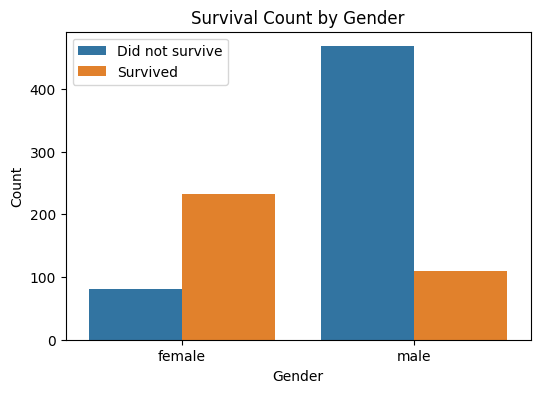

/tmp/ipython-input-319100870.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender = df.groupby('Sex')['Survived'].mean()



Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<Figure size 800x600 with 0 Axes>

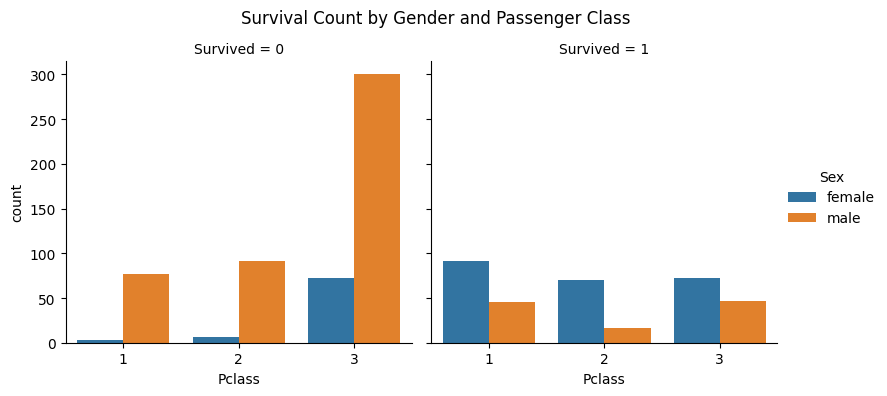


Survival Rates by Gender and Class:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


/tmp/ipython-input-319100870.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['Pclass', 'Sex'])['Survived'].mean())


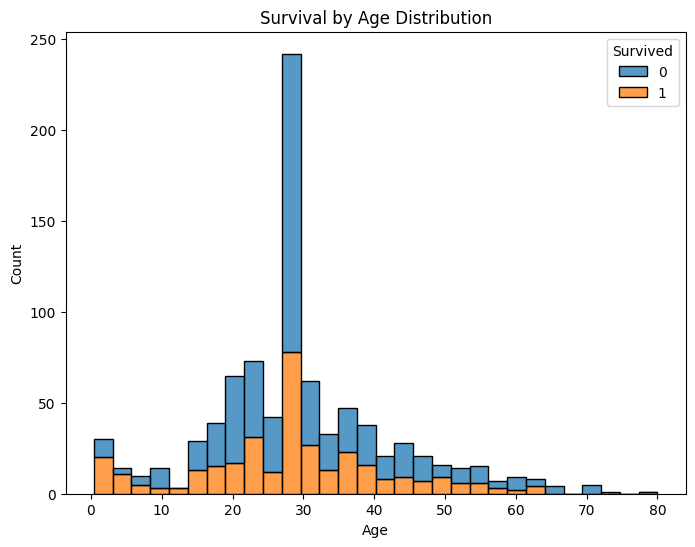

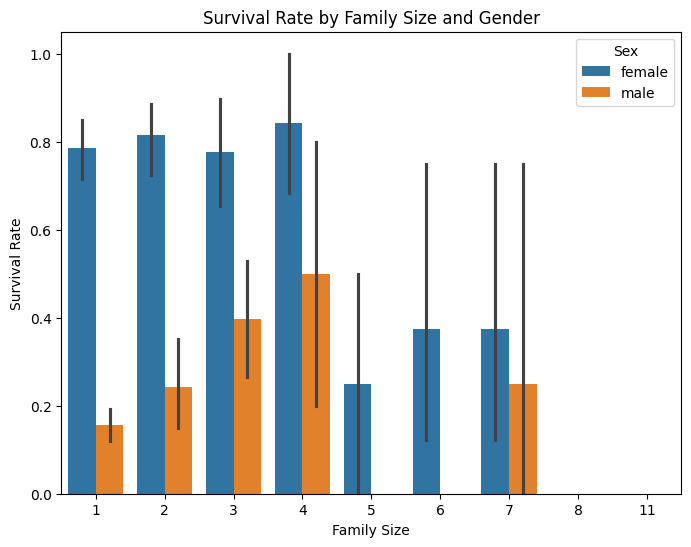

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival count for each gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Calculate and print survival rates by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rates by Gender:")
print(survival_by_gender)

# Survival rate by gender and class
plt.figure(figsize=(8,6))
sns.catplot(
    data=df,
    x='Pclass',
    hue='Sex',
    col='Survived',
    kind='count',
    height=4,
    aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Count by Gender and Passenger Class')
plt.show()

# Calculate and print survival rates by gender and class
print("\nSurvival Rates by Gender and Class:")
print(df.groupby(['Pclass', 'Sex'])['Survived'].mean())

# Optional: Survival by age and gender
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Optional: Survival by family size and gender
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='FamilySize', y='Survived', hue='Sex')
plt.title('Survival Rate by Family Size and Gender')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()
